In [9]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
# Normaliza los valores de píxeles de 0-255 a 0-1 (necesario para que la red aprenda mejor)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [11]:
# Cambiar la forma para que tenga canal (1 canal: escala de grises)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [12]:
# Codificación one-hot para las etiquetas
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Definir el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Capa de salida para clasificación
])

In [14]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Entrenar el modelo
history = model.fit(X_train, y_train,  # Aquí usamos 'y_train' y no 'y_train_cat'
                    epochs=5,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9013 - loss: 0.3160 - val_accuracy: 0.9872 - val_loss: 0.0462
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9856 - loss: 0.0461 - val_accuracy: 0.9863 - val_loss: 0.0483
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9907 - loss: 0.0291 - val_accuracy: 0.9908 - val_loss: 0.0321
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9941 - loss: 0.0185 - val_accuracy: 0.9898 - val_loss: 0.0367
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9956 - loss: 0.0143 - val_accuracy: 0.9910 - val_loss: 0.0375


In [18]:
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Precisión en test: {test_acc:.2f}")
    print(f"Perdida:" + str(test_loss))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9867 - loss: 0.0447
Precisión en test: 0.99
Perdida:0.03354761749505997


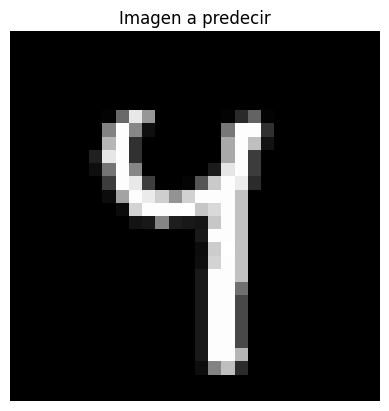

In [96]:
import matplotlib.pyplot as plt
idx = 902
#error = 902
image = X_test[idx]

plt.imshow(image.squeeze(), cmap="gray")
plt.title("Imagen a predecir")
plt.axis("off")
plt.show()

In [98]:
prediction = model.predict(np.expand_dims(image, axis=0))
print("Predictión:", np.argmax(prediction))
print(prediction)
print("Etiqueta real:", np.argmax(y_test[902]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predictión: 9
[[6.5359725e-11 1.7010138e-05 2.3420780e-06 2.1285148e-07 2.0193751e-01
  1.4629684e-05 7.0650263e-10 5.1363010e-04 1.1754497e-03 7.9633921e-01]]
Etiqueta real: 4
